### import

In [7]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

### Dataset

In [8]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [9]:
df = pd.read_csv('data/Most Streamed Spotify Songs 2024.csv',encoding="ISO-8859-1")
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [11]:
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


<AxesSubplot: >

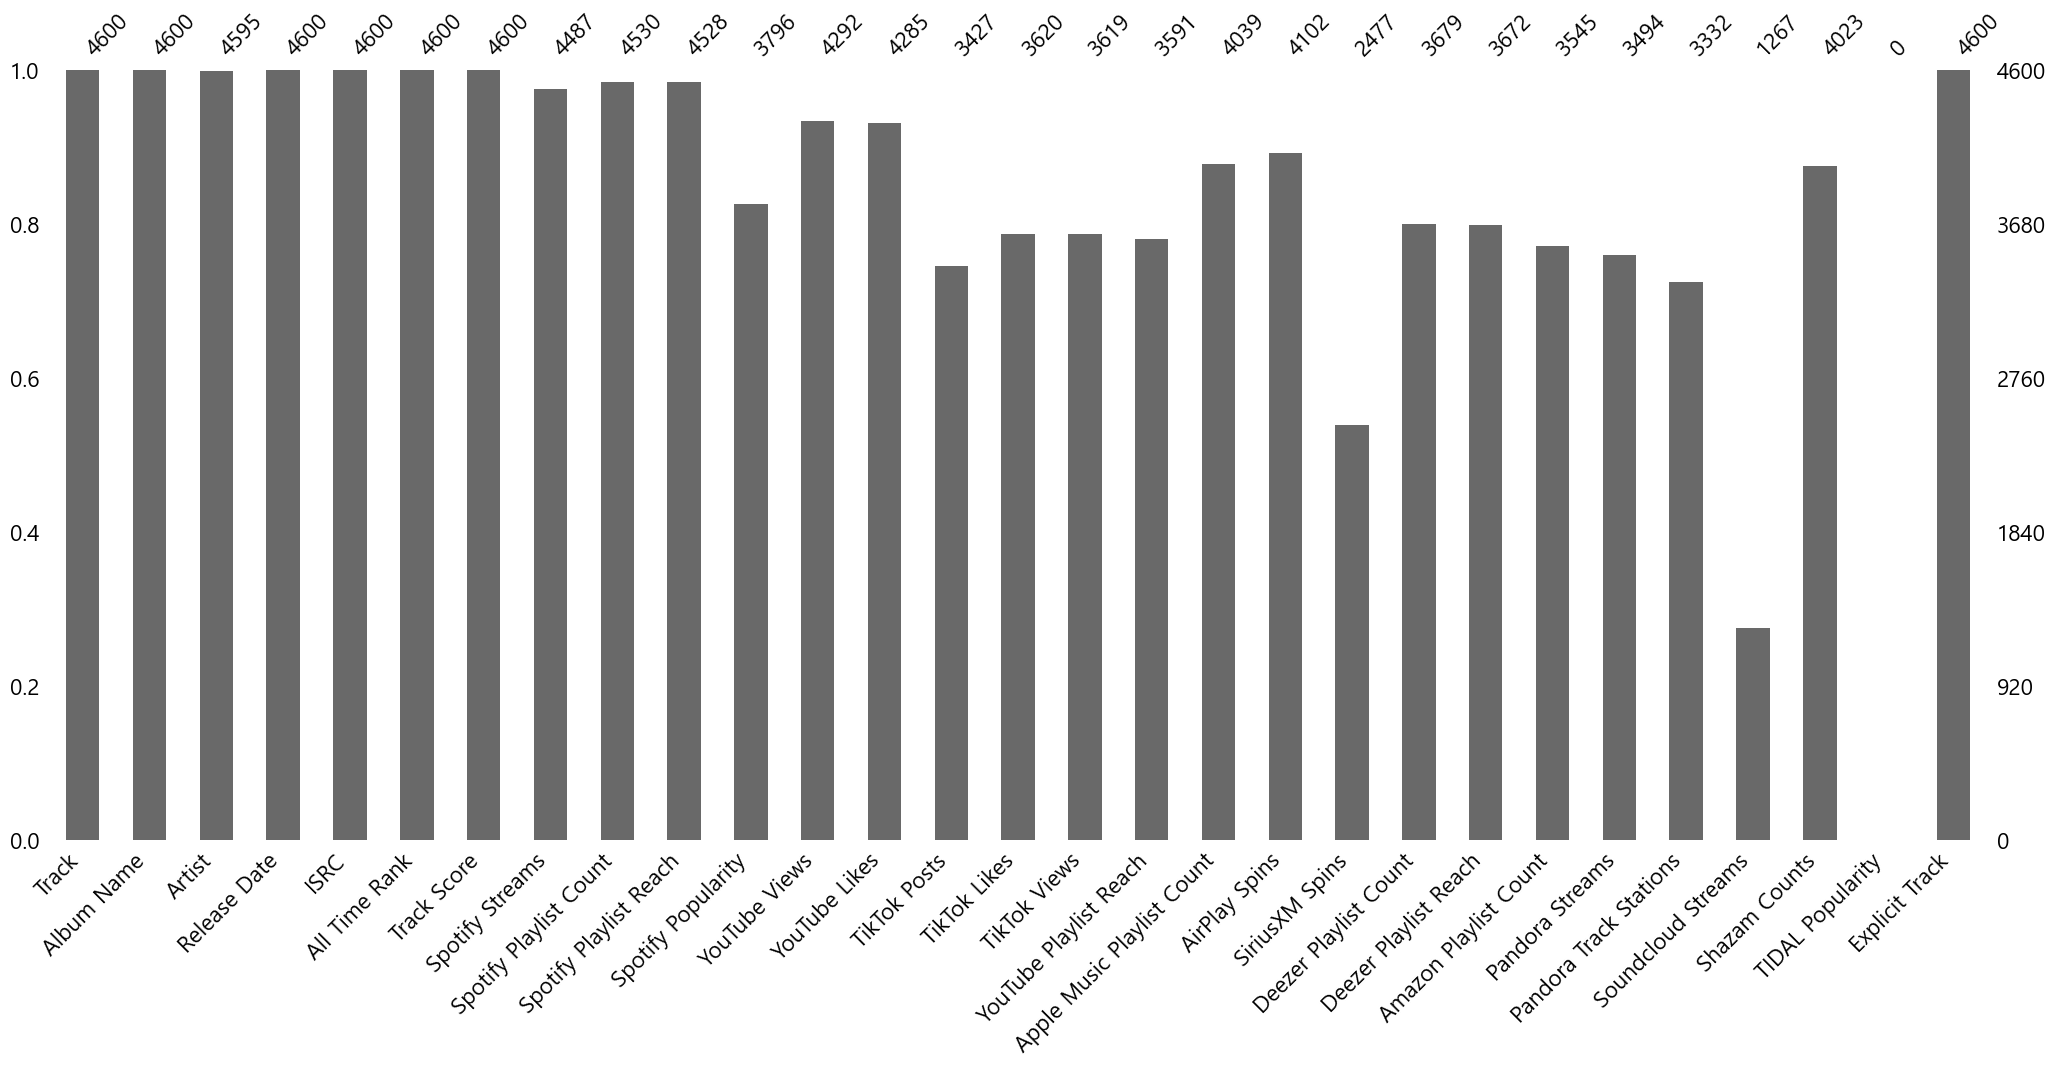

In [12]:
msno.bar(df)

In [13]:
df.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track'],
      dtype='object')

In [14]:
def fe(df):
    
    df['Release Date'] = pd.to_datetime(df['Release Date'], format='%m/%d/%Y')
    df['Year'] = df['Release Date'].dt.year
    df = df.drop(columns=["TIDAL Popularity"])
    
    return df
    
df = fe(df)
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,Year
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,4600.000000,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,0.358913,2020.616739
std,38.543766,16.186438,71.61227,54.274538,25.989826,0.479734,3.611707
min,19.400000,1.000000,1.00000,1.000000,1.000000,0.000000,1987.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,0.000000,2019.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,0.000000,2022.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,1.000000,2023.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,1.000000,2024.000000


### 연도별 평균 트랙 점수

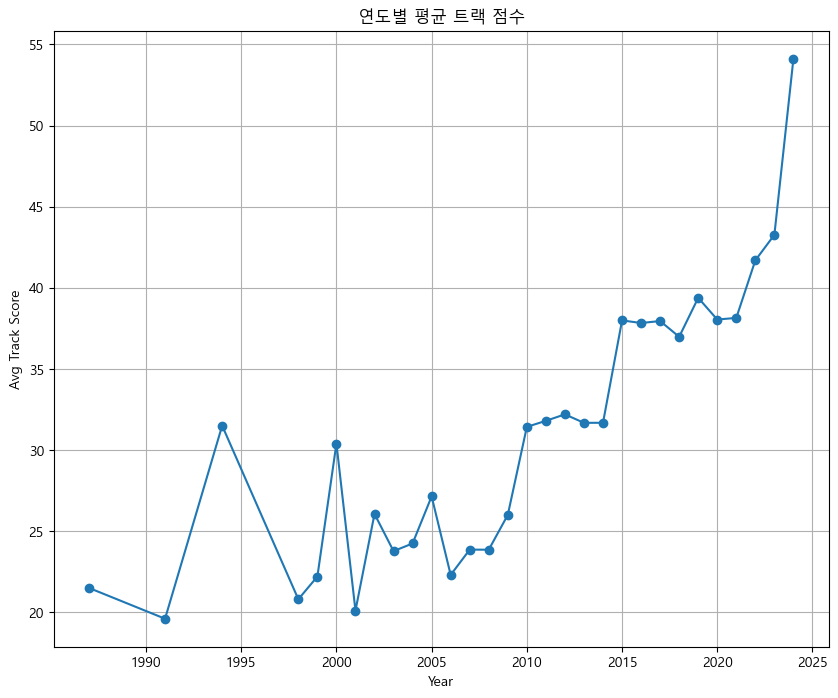

In [15]:
avg_year_track = df.groupby('Year')['Track Score'].mean()

plt.figure(figsize=(10, 8))
avg_year_track.plot(kind='line', marker='o')
plt.title('연도별 평균 트랙 점수')
plt.xlabel('Year')
plt.ylabel('Avg Track Score')
plt.grid(True)
plt.show()

### 연도별 최고 트랙 점수

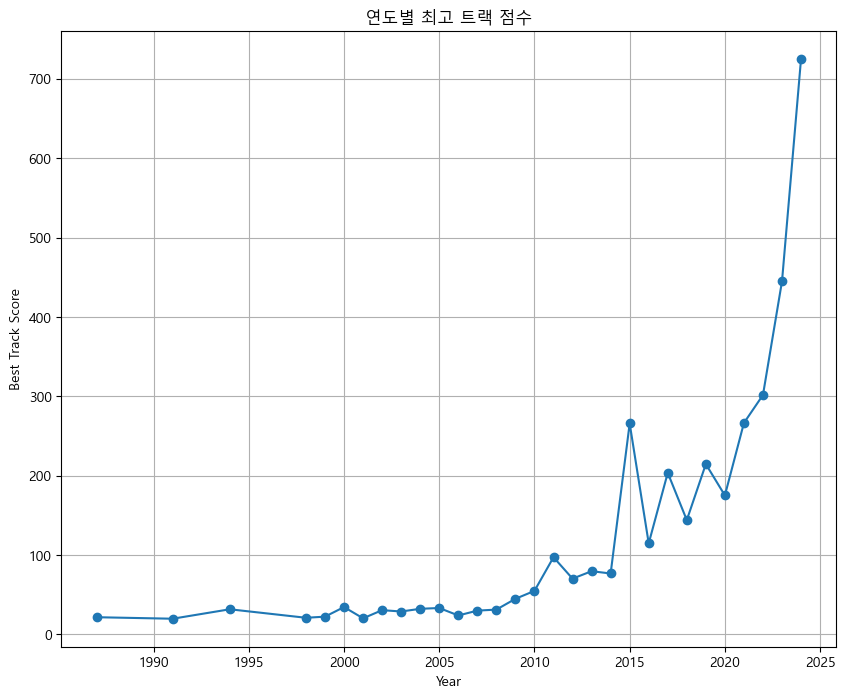

In [16]:
best_track_score_per_year = df.groupby('Year')['Track Score'].max()

plt.figure(figsize=(10, 8))
best_track_score_per_year.plot(kind='line', marker='o')
plt.title('연도별 최고 트랙 점수')
plt.xlabel('Year')
plt.ylabel('Best Track Score')
plt.grid(True)
plt.show()

### 연도별 최악 트랙 점수

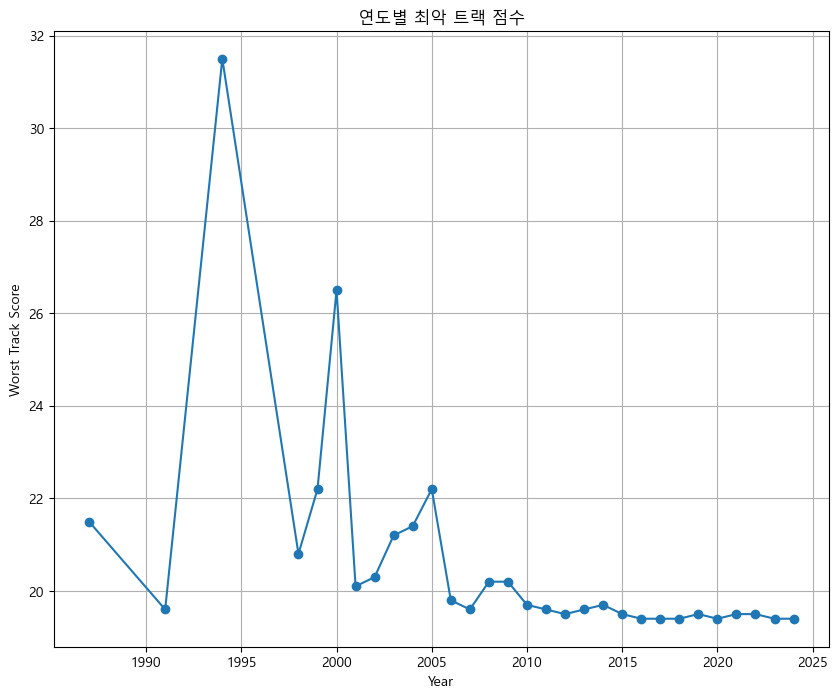

In [17]:
worst_track_score_per_year = df.groupby('Year')['Track Score'].min()

plt.figure(figsize=(10, 8))
worst_track_score_per_year.plot(kind='line', marker='o')
plt.title('연도별 최악 트랙 점수')
plt.xlabel('Year')
plt.ylabel('Worst Track Score')
plt.grid(True)
plt.show()

### 매년 트랙 수

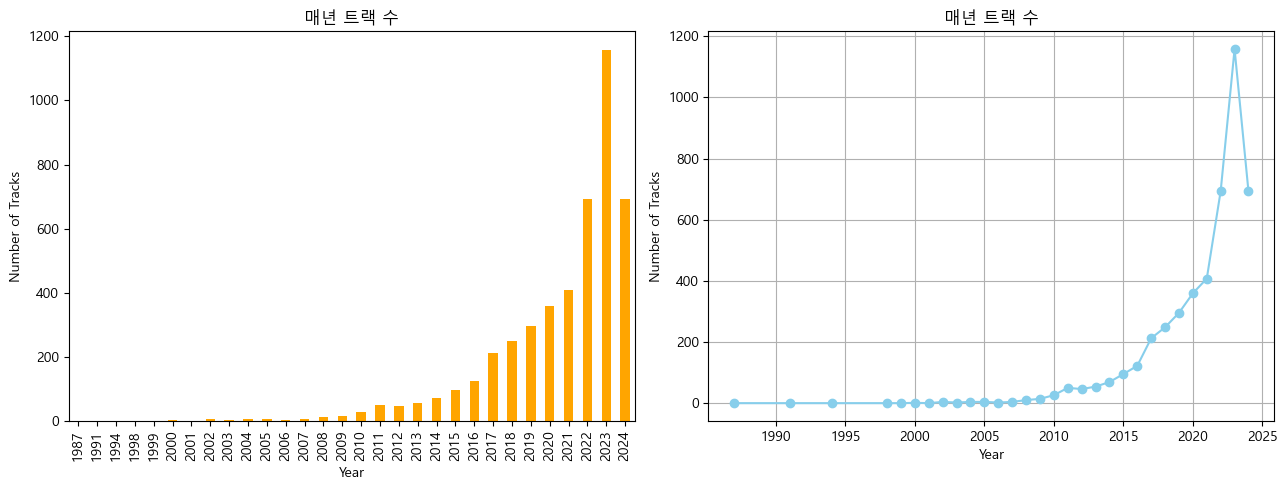

In [18]:
tracks_year = df.groupby('Year')['Track'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

tracks_year.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('매년 트랙 수')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Tracks')

tracks_year.plot(kind='line', ax=axes[1], color='skyblue', marker='o')
axes[1].set_title('매년 트랙 수')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Tracks')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 선정적인 내용 관심

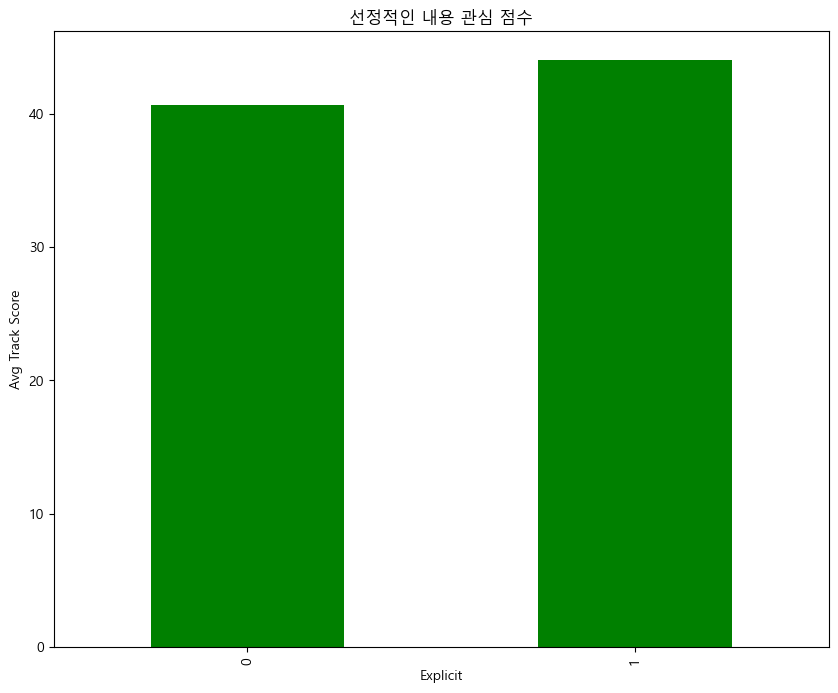

In [19]:
explicit_track_score = df.groupby('Explicit Track')['Track Score'].mean()

plt.figure(figsize=(10, 8))
explicit_track_score.plot(kind='bar', color='green')
plt.title('선정적인 내용 관심 점수')
plt.xlabel('Explicit')
plt.ylabel('Avg Track Score')
plt.show()

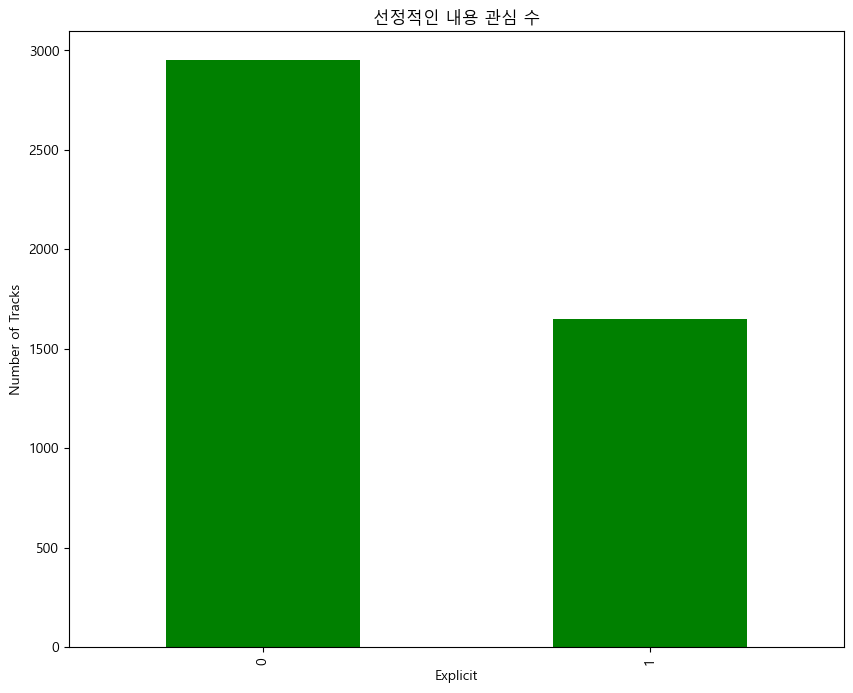

In [20]:
explicit_track_score = df.groupby('Explicit Track')['Track'].count()

plt.figure(figsize=(10, 8))
explicit_track_score.plot(kind='bar', color='green')
plt.title('선정적인 내용 관심 수')
plt.xlabel('Explicit')
plt.ylabel('Number of Tracks')
plt.show()

### 선정적인 내용 노래 변화

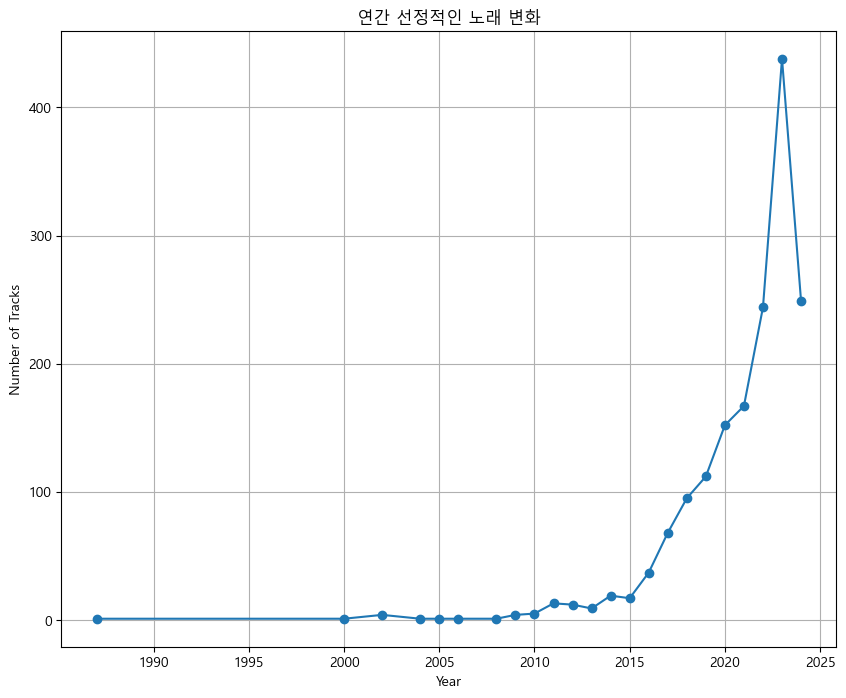

In [21]:
explicit_tracks = df[df['Explicit Track'] == 1]
explicit_tracks_year = explicit_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(10, 8))
explicit_tracks_year.plot(kind='line', marker='o')
plt.title('연간 선정적인 노래 변화')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()

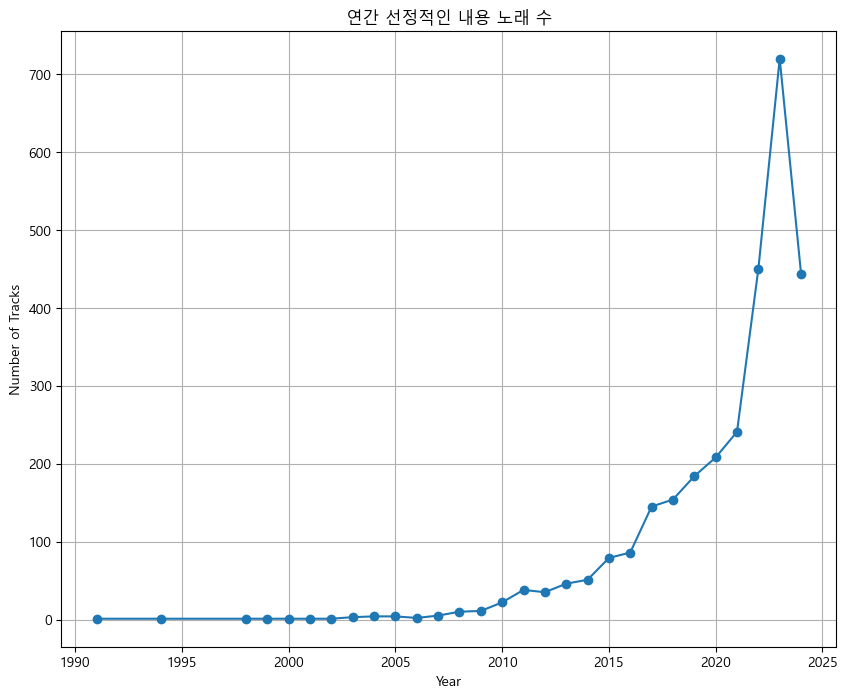

In [22]:
friendly_tracks = df[df['Explicit Track'] == 0]
friendly_tracks_per_year = friendly_tracks.groupby('Year')['Track'].count()

plt.figure(figsize=(10, 8))
friendly_tracks_per_year.plot(kind='line', marker='o')
plt.title('연간 선정적인 내용 노래 수')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.grid(True)
plt.show()